<H1>CA2 Data mining</H1>
Name : Yoosef Ghaderi

Student Number : 810103206

In [274]:
df = pd.read_csv("supermarket_sales.csv")

In [275]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [276]:
df.shape

(1000, 17)

In [5]:
len(df['gross income'].unique())

990

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Q1

### Star model

In [120]:
customers_dim_star = df[['Customer type', 'Gender']].drop_duplicates().reset_index(drop=True)
customers_dim_star['customer_id'] = customers_dim_star.index
customers_dim_star



,Customer type,Gender,customer_id
0,Member,Female,0
1,Normal,Female,1
2,Normal,Male,2
3,Member,Male,3


In [265]:
product_dim_star = df[['Product line', 'Unit price']].drop_duplicates().reset_index(drop=True)

product_dim_star['product_id'] = product_dim_star.index
product_dim_star


,Product line,Unit price,product_id
0,Health and beauty,74.69,0
1,Electronic accessories,15.28,1
2,Home and lifestyle,46.33,2
3,Health and beauty,58.22,3
4,Sports and travel,86.31,4
...,...,...,...
988,Health and beauty,40.35,988
989,Home and lifestyle,97.38,989
990,Food and beverages,31.84,990
991,Home and lifestyle,65.82,991


In [122]:
branch_dim_star = df[['Branch', 'City']].drop_duplicates().reset_index(drop=True)
branch_dim_star['branch_id'] = branch_dim_star.index
branch_dim_star


,Branch,City,branch_id
0,A,Yangon,0
1,C,Naypyitaw,1
2,B,Mandalay,2


I converted Date to datetime structure :)

In [266]:
datetime_dim_star = df[['Date', 'Time']].drop_duplicates().reset_index(drop=True)
datetime_dim_star["Date"] = pd.to_datetime(datetime_dim_star["Date"])
# datetime_dim_star["Time"] = pd.to_datetime(datetime_dim_star["Time"])

datetime_dim_star['datetime_id'] = datetime_dim_star.index
datetime_dim_star


,Date,Time,datetime_id
0,2019-01-05,13:08,0
1,2019-03-08,10:29,1
2,2019-03-03,13:23,2
3,2019-01-27,20:33,3
4,2019-02-08,10:37,4
...,...,...,...
989,2019-01-29,13:46,989
990,2019-03-02,17:16,990
991,2019-02-09,13:22,991
992,2019-02-22,15:33,992


In [267]:
financial_dim_star = df[['Tax 5%', 'Total', 'gross margin percentage', 'gross income']].drop_duplicates().reset_index(drop=True)
financial_dim_star['financial_id'] = financial_dim_star.index
financial_dim_star

,Tax 5%,Total,gross margin percentage,gross income,financial_id
0,26.1415,548.9715,4.761905,26.1415,0
1,3.8200,80.2200,4.761905,3.8200,1
2,16.2155,340.5255,4.761905,16.2155,2
3,23.2880,489.0480,4.761905,23.2880,3
4,30.2085,634.3785,4.761905,30.2085,4
...,...,...,...,...,...
985,2.0175,42.3675,4.761905,2.0175,985
986,48.6900,1022.4900,4.761905,48.6900,986
987,1.5920,33.4320,4.761905,1.5920,987
988,3.2910,69.1110,4.761905,3.2910,988


In [268]:
payment_dim_star = df[['Payment']].drop_duplicates().reset_index(drop=True)
payment_dim_star['payment_id'] = payment_dim_star.index
payment_dim_star

,Payment,payment_id
0,Ewallet,0
1,Cash,1
2,Credit card,2


In [298]:
fact_table = df.copy()


fact_table = fact_table.merge(customers_dim_star, on=['Customer type', 'Gender'])
fact_table = fact_table.merge(product_dim_star, on=['Product line', 'Unit price'])
fact_table = fact_table.merge(branch_dim_star, on=['Branch', 'City'])
fact_table["Date"] = pd.to_datetime(fact_table["Date"])
fact_table = fact_table.merge(datetime_dim_star, on=['Time' , 'Date'])
fact_table = fact_table.merge(financial_dim_star, on=['Tax 5%', 'Total', 'gross margin percentage', 'gross income'])
fact_table = fact_table.merge(payment_dim_star, on=['Payment'])

# Keep only necessary columns for fact table
fact_table_star = fact_table[['Invoice ID', 'customer_id', 'product_id', 'branch_id', 'datetime_id', 
                              'financial_id', 'payment_id', 'Quantity', 'cogs', 'Rating']]
fact_table_star

,Invoice ID,customer_id,product_id,branch_id,datetime_id,financial_id,payment_id,Quantity,cogs,Rating
0,750-67-8428,0,0,0,0,0,0,7,522.83,9.1
1,226-31-3081,1,1,1,1,1,1,5,76.40,9.6
2,631-41-3108,2,2,0,2,2,2,7,324.31,7.4
3,123-19-1176,3,3,0,3,3,0,8,465.76,8.4
4,373-73-7910,2,4,0,4,4,0,7,604.17,5.3
...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,988,1,989,985,0,1,40.35,6.2
996,303-96-2227,1,989,2,990,986,0,10,973.80,4.4
997,727-02-1313,3,990,0,991,987,1,1,31.84,7.7
998,347-56-2442,2,991,0,992,988,1,1,65.82,4.1


### crating snowflake model 


In [299]:
### 1️⃣ Create Separate Mapping Tables ###

fact_table_snowflake = fact_table_star.copy()

customer_type_dim = pd.DataFrame({'customer_type_id': range(df['Customer type'].nunique()),
                                  'Customer type': df['Customer type'].unique()})

gender_dim = pd.DataFrame({'gender_id': range(df['Gender'].nunique()),
                           'Gender': df['Gender'].unique()})

product_category_dim = pd.DataFrame({'product_category_id': range(df['Product line'].nunique()),
                                     'Product Line': df['Product line'].unique()})

city_dim = pd.DataFrame({'city_id': range(df['City'].nunique()),
                         'City': df['City'].unique()})

### 2️⃣ Create Normalized Dimension Tables Using Mappings ###
customers_dim_snowflake = df[['Customer type', 'Gender']].drop_duplicates().reset_index(drop=True)

# Map IDs from separate mapping tables
customers_dim_snowflake['customer_type_id'] = customers_dim_snowflake['Customer type'].map(customer_type_dim.set_index('Customer type')['customer_type_id'])
customers_dim_snowflake['gender_id'] = customers_dim_snowflake['Gender'].map(gender_dim.set_index('Gender')['gender_id'])

# Drop original columns and add unique customer ID
customers_dim_snowflake = customers_dim_snowflake[['customer_type_id', 'gender_id']].reset_index(drop=True)
customers_dim_snowflake['customer_id'] = customers_dim_snowflake.index

product_dim_snowflake = df[['Product line', 'Unit price']].drop_duplicates().reset_index(drop=True)

# Map product category ID
product_dim_snowflake['product_category_id'] = product_dim_snowflake['Product line'].map(product_category_dim.set_index('Product Line')['product_category_id'])

# Drop original column and add unique product ID
product_dim_snowflake = product_dim_snowflake[['product_category_id', 'Unit price']].reset_index(drop=True)
product_dim_snowflake['product_id'] = product_dim_snowflake.index

branch_dim_snowflake = df[['Branch', 'City']].drop_duplicates().reset_index(drop=True)

# Map city ID
branch_dim_snowflake['city_id'] = branch_dim_snowflake['City'].map(city_dim.set_index('City')['city_id'])

# Drop original column and add unique branch ID
branch_dim_snowflake = branch_dim_snowflake[['Branch', 'city_id']].reset_index(drop=True)
branch_dim_snowflake['branch_id'] = branch_dim_snowflake.index



In [281]:
### 3️⃣ Display Results ###
print("✅ Customer Type Table:\n", customer_type_dim)
print("\n✅ Gender Table:\n", gender_dim)
print("\n✅ Customers Dimension:\n", customers_dim_snowflake)

print("\n✅ Product Category Table:\n", product_category_dim)
print("\n✅ Product Dimension:\n", product_dim_snowflake)

print("\n✅ City Table:\n", city_dim)
print("\n✅ Branch Dimension:\n", branch_dim_snowflake)

✅ Customer Type Table:
    customer_type_id Customer type
0                 0        Member
1                 1        Normal

✅ Gender Table:
    gender_id  Gender
0          0  Female
1          1    Male

✅ Customers Dimension:
    customer_type_id  gender_id  customer_id
0                 0          0            0
1                 1          0            1
2                 1          1            2
3                 0          1            3

✅ Product Category Table:
    product_category_id            Product Line
0                    0       Health and beauty
1                    1  Electronic accessories
2                    2      Home and lifestyle
3                    3       Sports and travel
4                    4      Food and beverages
5                    5     Fashion accessories

✅ Product Dimension:
      product_category_id  Unit price  product_id
0                      0       74.69           0
1                      1       15.28           1
2                    

### B

In [304]:
import pandas as pd
import time

start_time_star = time.time()


merged_star = fact_table_star.merge(product_dim_star, on="product_id")


merged_star = merged_star.merge(financial_dim_star, on="financial_id")


total_per_product_line_star = merged_star.groupby("Product line")["Total"].sum().reset_index()


end_time_star = time.time()
execution_time_star = end_time_star - start_time_star


start_time_snowflake = time.time()


merged_snowflake = fact_table_snowflake.merge(product_dim_star, on="product_id")
merged_snowflake = merged_snowflake.merge(financial_dim_star, on="financial_id")


total_per_product_line_snowflake = merged_snowflake.groupby("Product line")["Total"].sum().reset_index()


end_time_snowflake = time.time()
execution_time_snowflake = end_time_snowflake - start_time_snowflake


execution_time_star, execution_time_snowflake


(0.0009958744049072266, 0.018701553344726562)

Analysis & Comparison

Star Schema is typically faster because it reduces the number of JOIN operations, keeping data denormalized.

Snowflake Schema often results in slower execution because of multiple joins needed to reconstruct the full dataset.

### Memory usage

#### Star 

The values are in units of bytes.

In [300]:
print("Memory usage df:", df.memory_usage(deep=True).sum(), "Byte")

print("Star Schema:", 
      customers_dim_star.memory_usage(deep=True).sum() + 
      product_dim_star.memory_usage(deep=True).sum() + 
      branch_dim_star.memory_usage(deep=True).sum() + 
      financial_dim_star.memory_usage(deep=True).sum() + 
      fact_table_star.memory_usage(deep=True).sum(), "Byte")

print("Snowflake Schema:", 
      customer_type_dim.memory_usage(deep=True).sum() + 
      gender_dim.memory_usage(deep=True).sum() + 
      customers_dim_snowflake.memory_usage(deep=True).sum() + 
      product_category_dim.memory_usage(deep=True).sum() + 
      product_dim_snowflake.memory_usage(deep=True).sum() + 
      city_dim.memory_usage(deep=True).sum() + 
      branch_dim_snowflake.memory_usage(deep=True).sum()+
      fact_table_snowflake.memory_usage(deep=True).sum(), "Byte")




Memory usage df: 647207 Byte
Star Schema: 272058 Byte
Snowflake Schema: 166175 Byte


In [ ]:
import pandas as pd
import time

# Star Schema Computation
start_time_star = time.time()

# Merge fact_table_star with product_dim_star on product_id
merged_star = fact_table_star.merge(product_dim_star, on="product_id")

# Merge with financial_dim_star on financial_id
merged_star = merged_star.merge(financial_dim_star, on="financial_id")

# Group by Product line and sum Total
total_per_product_line_star = merged_star.groupby("Product line")["Total"].sum().reset_index()

# End timing for Star Schema
end_time_star = time.time()
execution_time_star = end_time_star - start_time_star

# Snowflake Schema Computation (Assuming normalized structure)
start_time_snowflake = time.time()

# In Snowflake, we assume product and financial details are in separate tables
merged_snowflake = fact_table_star.merge(product_dim_star, on="product_id")
merged_snowflake = merged_snowflake.merge(financial_dim_star, on="financial_id")

# Group by Product line and sum Total
total_per_product_line_snowflake = merged_snowflake.groupby("Product line")["Total"].sum().reset_index()

# End timing for Snowflake Schema
end_time_snowflake = time.time()
execution_time_snowflake = end_time_snowflake - start_time_snowflake

# Compare Execution Times
execution_time_star, execution_time_snowflake


## Q2

### star model

In [264]:
import time


start_time = time.time()

merged_df_star = fact_table_star.merge(product_dim_star, on="product_id")


merged_df_star = merged_df_star.merge(financial_dim_star, on="financial_id")


total_per_product_line_star = merged_df_star.groupby("Product line")["Total"].sum().reset_index()


end_time = time.time()
execution_time_star = end_time - start_time


print(execution_time_star)
total_per_product_line_star

0.010671377182006836


,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


### snowflake model

## Q3

### A

In [157]:
type(datetime_dim_star['Date'][0])

ymd_sale = fact_table_star.merge(datetime_dim_star, on="datetime_id").merge(financial_dim_star , on="financial_id")

ymd_sale["Year"] = ymd_sale["Date"].dt.year
ymd_sale["Month"] = ymd_sale["Date"].dt.month


# Summation of selling at Year level
yearly_sales = ymd_sale.groupby("Year")["Total"].sum().reset_index()

# Summation of selling at Month level
monthly_sales = ymd_sale.groupby("Month")["Total"].sum().reset_index()



print(yearly_sales)
print(monthly_sales)


   Year       Total
0  2019  322966.749
   Month       Total
0      1  116291.868
1      2   97219.374
2      3  109455.507


### B

When I check, I see that sales in the best month are the first month of the year, then we had a drop in the second month, but sales still improved, but we have no idea about the rest of the year because there is no data.

### C

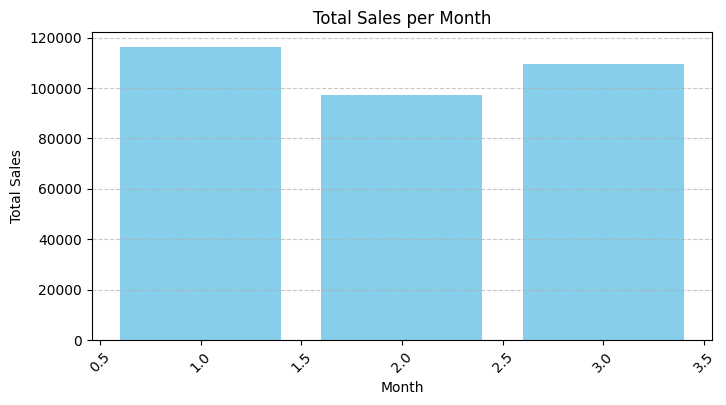

In [256]:
import matplotlib.pyplot as plt

# Plot monthly sales as a bar chart
plt.figure(figsize=(8, 4))
plt.bar(monthly_sales["Month"], monthly_sales["Total"], color='skyblue')

# Formatting
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales per Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Q4

### A

In [158]:
ymd_sale

,Invoice ID,customer_id,product_id,branch_id,datetime_id,financial_id,payment_id,Quantity,cogs,Rating,Date,Time,Tax 5%,Total,gross margin percentage,gross income,Year,Month
0,750-67-8428,0,0,0,0,0,0,7,522.83,9.1,2019-01-05,13:08,26.1415,548.9715,4.761905,26.1415,2019,1
1,226-31-3081,1,1,1,1,1,1,5,76.40,9.6,2019-03-08,10:29,3.8200,80.2200,4.761905,3.8200,2019,3
2,631-41-3108,2,2,0,2,2,2,7,324.31,7.4,2019-03-03,13:23,16.2155,340.5255,4.761905,16.2155,2019,3
3,123-19-1176,3,3,0,3,3,0,8,465.76,8.4,2019-01-27,20:33,23.2880,489.0480,4.761905,23.2880,2019,1
4,373-73-7910,2,4,0,4,4,0,7,604.17,5.3,2019-02-08,10:37,30.2085,634.3785,4.761905,30.2085,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,988,1,989,985,0,1,40.35,6.2,2019-01-29,13:46,2.0175,42.3675,4.761905,2.0175,2019,1
996,303-96-2227,1,989,2,990,986,0,10,973.80,4.4,2019-03-02,17:16,48.6900,1022.4900,4.761905,48.6900,2019,3
997,727-02-1313,3,990,0,991,987,1,1,31.84,7.7,2019-02-09,13:22,1.5920,33.4320,4.761905,1.5920,2019,2
998,347-56-2442,2,991,0,992,988,1,1,65.82,4.1,2019-02-22,15:33,3.2910,69.1110,4.761905,3.2910,2019,2


In [161]:
ymd_sale["Day"] = ymd_sale["Date"].dt.day

day_branch_sales = ymd_sale.groupby(["Day" , "branch_id"])["Total"].sum().reset_index()

print(day_branch_sales)


    Day  branch_id      Total
0     1          0  3927.4725
1     1          1  3426.6015
2     1          2  2470.0095
3     2          0  1968.4665
4     2          1  4333.9485
..  ...        ...        ...
88   30          1  3249.1830
89   30          2  2180.1150
90   31          0   588.1575
91   31          1  1862.0595
92   31          2  2782.2795

[93 rows x 3 columns]


Mean of Total in city Yangon and branch A is : 3425.8184032258064


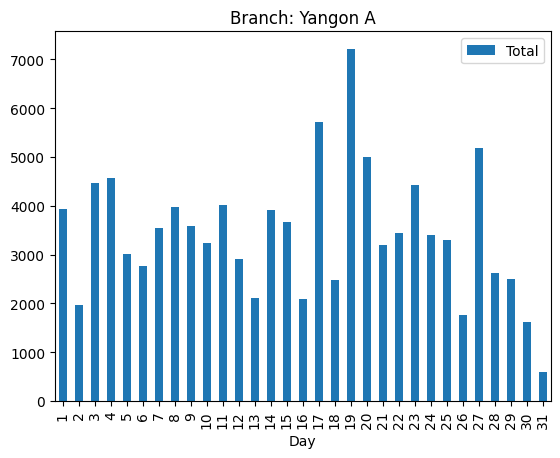

Mean of Total in city Naypyitaw and branch C is : 3566.732467741936


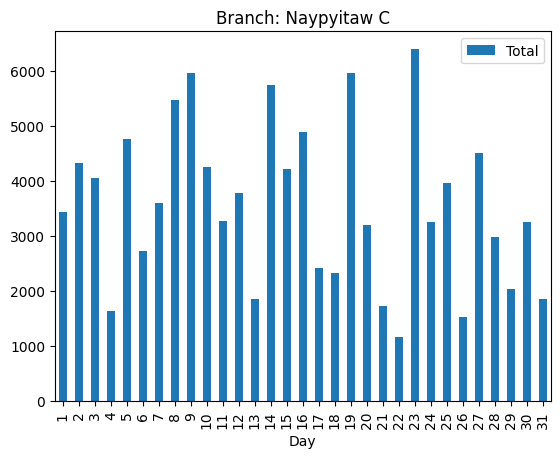

Mean of Total in city Mandalay and branch B is : 3425.7313548387096


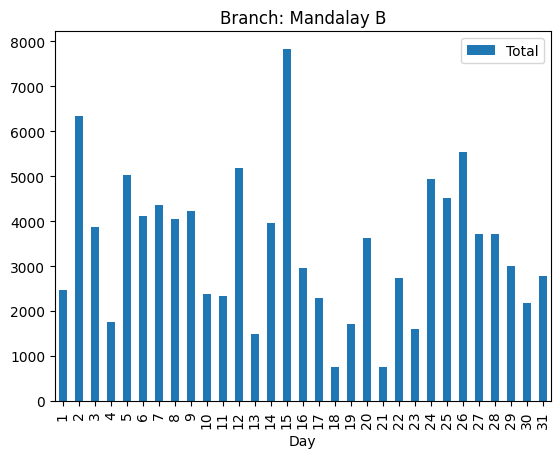

In [ ]:
import matplotlib.pyplot as plt

day_branch_sales = day_branch_sales.merge(branch_dim_star, on='branch_id', how='left')

for branch_id, group in day_branch_sales.groupby("branch_id"):
    city_branch = group['City'].iloc[0] + " " + group['Branch'].iloc[0]
    print(f"Mean of Total in city {group['City'].iloc[0]} and branch {group['Branch'].iloc[0]} is : {group['Total'].mean()}")
    ax = group.plot(kind="bar", x="Day", y="Total", title=f"Branch: {city_branch}")
    plt.show()


### B

when I calcualted total sell for each day I used of min and max function to figure out which day of month max and which min sell happens 

In [ ]:
for branch_id, group in day_branch_sales.groupby("branch_id"):
    city_branch = group['City'].iloc[0] + " " + group['Branch'].iloc[0]
    print(f"Min Total \n{group[group['Total']==group['Total'].min()]}")
    print(f"Max Total \n{group[group['Total']==group['Total'].max()]}")
    print(30 *("-"))


Min Total 
    Day  branch_id     Total Branch    City
90   31          0  588.1575      A  Yangon
Max Total 
    Day  branch_id      Total Branch    City
54   19          0  7209.9405      A  Yangon
------------------------------
Min Total 
    Day  branch_id     Total Branch       City
64   22          1  1159.893      C  Naypyitaw
Max Total 
    Day  branch_id     Total Branch       City
67   23          1  6399.435      C  Naypyitaw
------------------------------
Min Total 
    Day  branch_id    Total Branch      City
62   21          2  746.655      B  Mandalay
Max Total 
    Day  branch_id     Total Branch      City
44   15          2  7826.952      B  Mandalay
------------------------------


finding effect of day of week on sell

first I used of day_name to find which day of week is each date

In [164]:
ymd_sale['day_of_week'] = ymd_sale['Date'].dt.day_name()
ymd_sale

,Invoice ID,customer_id,product_id,branch_id,datetime_id,financial_id,payment_id,Quantity,cogs,Rating,Date,Time,Tax 5%,Total,gross margin percentage,gross income,Year,Month,Day,day_of_week
0,750-67-8428,0,0,0,0,0,0,7,522.83,9.1,2019-01-05,13:08,26.1415,548.9715,4.761905,26.1415,2019,1,5,Saturday
1,226-31-3081,1,1,1,1,1,1,5,76.40,9.6,2019-03-08,10:29,3.8200,80.2200,4.761905,3.8200,2019,3,8,Friday
2,631-41-3108,2,2,0,2,2,2,7,324.31,7.4,2019-03-03,13:23,16.2155,340.5255,4.761905,16.2155,2019,3,3,Sunday
3,123-19-1176,3,3,0,3,3,0,8,465.76,8.4,2019-01-27,20:33,23.2880,489.0480,4.761905,23.2880,2019,1,27,Sunday
4,373-73-7910,2,4,0,4,4,0,7,604.17,5.3,2019-02-08,10:37,30.2085,634.3785,4.761905,30.2085,2019,2,8,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,988,1,989,985,0,1,40.35,6.2,2019-01-29,13:46,2.0175,42.3675,4.761905,2.0175,2019,1,29,Tuesday
996,303-96-2227,1,989,2,990,986,0,10,973.80,4.4,2019-03-02,17:16,48.6900,1022.4900,4.761905,48.6900,2019,3,2,Saturday
997,727-02-1313,3,990,0,991,987,1,1,31.84,7.7,2019-02-09,13:22,1.5920,33.4320,4.761905,1.5920,2019,2,9,Saturday
998,347-56-2442,2,991,0,992,988,1,1,65.82,4.1,2019-02-22,15:33,3.2910,69.1110,4.761905,3.2910,2019,2,22,Friday


In [165]:
weekday_branch_sales = ymd_sale.groupby(["day_of_week" , "branch_id"])["Total"].sum().reset_index()

weekday_branch_sales

,day_of_week,branch_id,Total
0,Friday,0,14543.8650
1,Friday,1,14964.7155
2,Friday,2,14417.7600
3,Monday,0,14239.0605
4,Monday,1,10925.3130
5,Monday,2,12734.7045
6,Saturday,0,16765.4130
7,Saturday,1,18070.9725
8,Saturday,2,21284.4240
9,Sunday,0,17006.8185


In [167]:
weekday_branch_sales = weekday_branch_sales.merge(branch_dim_star, on='branch_id', how='left')

Min of sell in city Yangon and branch A is : Wednesday
Max of sell in city Yangon and branch A is : Sunday


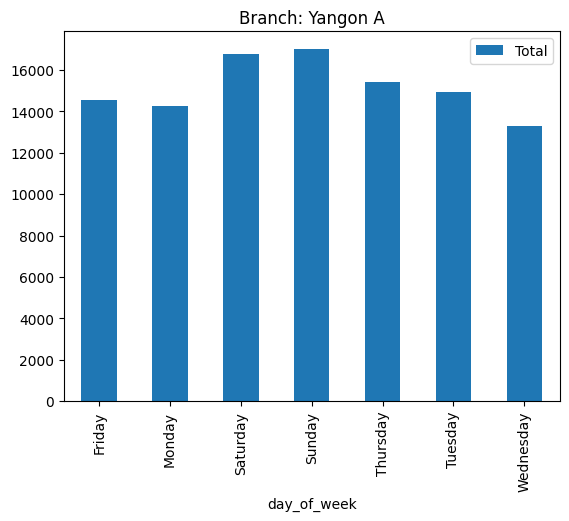

Min of sell in city Naypyitaw and branch C is : Monday
Max of sell in city Naypyitaw and branch C is : Saturday


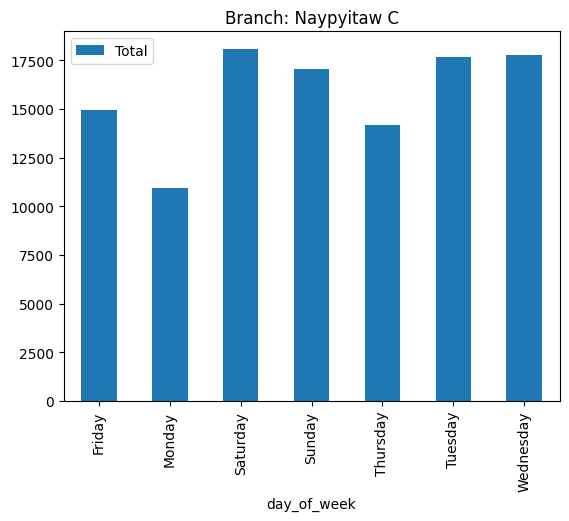

Min of sell in city Mandalay and branch B is : Sunday
Max of sell in city Mandalay and branch B is : Saturday


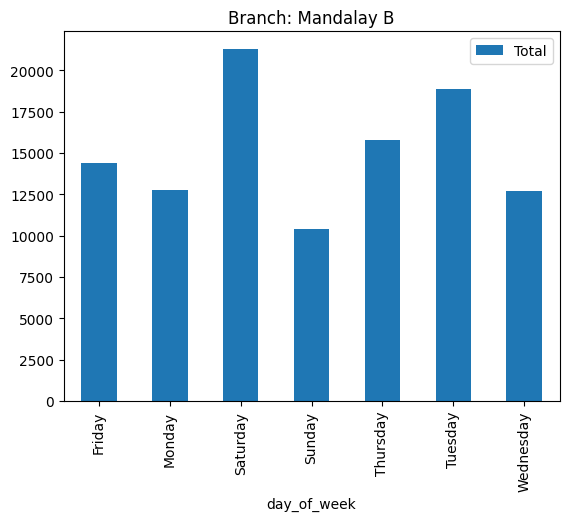

In [252]:
import matplotlib.pyplot as plt



# Now plot using City and Branch for the title
for branch_id, group in weekday_branch_sales.groupby("branch_id"):
    city_branch = group['City'].iloc[0] + " " + group['Branch'].iloc[0]
    print(f"Min of sell in city {group['City'].iloc[0]} and branch {group['Branch'].iloc[0]} is : {group[group['Total']==group['Total'].min()]['day_of_week'].to_string(index = False)}")
    print(f"Max of sell in city {group['City'].iloc[0]} and branch {group['Branch'].iloc[0]} is : {group[group['Total']==group['Total'].max()]['day_of_week'].to_string(index = False)}")
    ax = group.plot(kind="bar", x="day_of_week", y="Total", title=f"Branch: {city_branch}")
    plt.show()


## Q5

### A

In [170]:
day_branch_sales

,Day,branch_id,Total,Branch,City
0,1,0,3927.4725,A,Yangon
1,1,1,3426.6015,C,Naypyitaw
2,1,2,2470.0095,B,Mandalay
3,2,0,1968.4665,A,Yangon
4,2,1,4333.9485,C,Naypyitaw
...,...,...,...,...,...
88,30,1,3249.1830,C,Naypyitaw
89,30,2,2180.1150,B,Mandalay
90,31,0,588.1575,A,Yangon
91,31,1,1862.0595,C,Naypyitaw


In [171]:
day_branch_sales
data_cube_branch = pd.pivot_table(day_branch_sales, values='Total', index=['City', 'Branch'], aggfunc="sum")
data_cube_branch

,,Total
City,Branch,
Mandalay,B,106197.6720
Naypyitaw,C,110568.7065
Yangon,A,106200.3705


### B

well based on our datacube we can identify that branch C  has the highest sales.

### C

In [172]:
product_dim_star

,Product line,Unit price,product_id
0,Health and beauty,74.69,0
1,Electronic accessories,15.28,1
2,Home and lifestyle,46.33,2
3,Health and beauty,58.22,3
4,Sports and travel,86.31,4
...,...,...,...
988,Health and beauty,40.35,988
989,Home and lifestyle,97.38,989
990,Food and beverages,31.84,990
991,Home and lifestyle,65.82,991


In [173]:
fact_table_star = fact_table_star.merge( product_dim_star , on=['product_id'])
fact_table_star


,Invoice ID,customer_id,product_id,branch_id,datetime_id,financial_id,payment_id,Quantity,cogs,Rating,Product line,Unit price
0,750-67-8428,0,0,0,0,0,0,7,522.83,9.1,Health and beauty,74.69
1,226-31-3081,1,1,1,1,1,1,5,76.40,9.6,Electronic accessories,15.28
2,631-41-3108,2,2,0,2,2,2,7,324.31,7.4,Home and lifestyle,46.33
3,123-19-1176,3,3,0,3,3,0,8,465.76,8.4,Health and beauty,58.22
4,373-73-7910,2,4,0,4,4,0,7,604.17,5.3,Sports and travel,86.31
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,988,1,989,985,0,1,40.35,6.2,Health and beauty,40.35
996,303-96-2227,1,989,2,990,986,0,10,973.80,4.4,Home and lifestyle,97.38
997,727-02-1313,3,990,0,991,987,1,1,31.84,7.7,Food and beverages,31.84
998,347-56-2442,2,991,0,992,988,1,1,65.82,4.1,Home and lifestyle,65.82


In [ ]:
fact_table_star = fact_table_star.merge(branch_dim_star , on =['branch_id'])
fact_table_star = fact_table_star.merge(financial_dim_star , on =['financial_id'])


fact_table_star

,Invoice ID,customer_id,product_id,branch_id,datetime_id,financial_id,payment_id,Quantity,cogs,Rating,Product line,Unit price,Tax 5%,Total,gross margin percentage,gross income,Branch,City
0,750-67-8428,0,0,0,0,0,0,7,522.83,9.1,Health and beauty,74.69,26.1415,548.9715,4.761905,26.1415,A,Yangon
1,226-31-3081,1,1,1,1,1,1,5,76.40,9.6,Electronic accessories,15.28,3.8200,80.2200,4.761905,3.8200,C,Naypyitaw
2,631-41-3108,2,2,0,2,2,2,7,324.31,7.4,Home and lifestyle,46.33,16.2155,340.5255,4.761905,16.2155,A,Yangon
3,123-19-1176,3,3,0,3,3,0,8,465.76,8.4,Health and beauty,58.22,23.2880,489.0480,4.761905,23.2880,A,Yangon
4,373-73-7910,2,4,0,4,4,0,7,604.17,5.3,Sports and travel,86.31,30.2085,634.3785,4.761905,30.2085,A,Yangon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,988,1,989,985,0,1,40.35,6.2,Health and beauty,40.35,2.0175,42.3675,4.761905,2.0175,C,Naypyitaw
996,303-96-2227,1,989,2,990,986,0,10,973.80,4.4,Home and lifestyle,97.38,48.6900,1022.4900,4.761905,48.6900,B,Mandalay
997,727-02-1313,3,990,0,991,987,1,1,31.84,7.7,Food and beverages,31.84,1.5920,33.4320,4.761905,1.5920,A,Yangon
998,347-56-2442,2,991,0,992,988,1,1,65.82,4.1,Home and lifestyle,65.82,3.2910,69.1110,4.761905,3.2910,A,Yangon


product line for each city

In [178]:
data_cube_branch = pd.pivot_table(fact_table_star, values='Total', index=['City', 'Product line'], aggfunc="sum")
data_cube_branch

Total
City      Product line                      
Mandalay  Electronic accessories  17051.4435
          Fashion accessories     16413.3165
          Food and beverages      15214.8885
          Health and beauty       19980.6600
          Home and lifestyle      17549.1645
          Sports and travel       19988.1990
Naypyitaw Electronic accessories  18968.9745
          Fashion accessories     21560.0700
          Food and beverages      23766.8550
          Health and beauty       16615.3260
          Home and lifestyle      13895.5530
          Sports and travel       15761.9280
Yangon    Electronic accessories  18317.1135
          Fashion accessories     16332.5085
          Food and beverages      17163.1005
          Health and beauty       12597.7530
          Home and lifestyle      22417.1955
          Sports and travel       19372.6995

finding which have max sold for each product line

In [188]:
for _ , group in data_cube_branch.groupby('Product line'):
    print(group[group['Total']==group['Total'].max()])
    print(40*("*"))



                                       Total
City      Product line                      
Naypyitaw Electronic accessories  18968.9745
****************************************
                                  Total
City      Product line                 
Naypyitaw Fashion accessories  21560.07
****************************************
                                  Total
City      Product line                 
Naypyitaw Food and beverages  23766.855
****************************************
                               Total
City     Product line               
Mandalay Health and beauty  19980.66
****************************************
                                Total
City   Product line                  
Yangon Home and lifestyle  22417.1955
****************************************
                                Total
City     Product line                
Mandalay Sports and travel  19988.199
****************************************


## Q6

### A

In [197]:
elec_access = fact_table_star[fact_table_star['Product line'] == "Electronic accessories"]
elec_access

,Invoice ID,customer_id,product_id,branch_id,datetime_id,financial_id,payment_id,Quantity,cogs,Rating,Product line,Unit price,Tax 5%,Total,gross margin percentage,gross income,Branch,City
1,226-31-3081,1,1,1,1,1,1,5,76.40,9.6,Electronic accessories,15.28,3.8200,80.2200,4.761905,3.8200,C,Naypyitaw
5,699-14-3026,2,5,1,5,5,0,7,597.73,4.1,Electronic accessories,85.39,29.8865,627.6165,4.761905,29.8865,C,Naypyitaw
6,355-53-5943,0,6,0,6,6,0,6,413.04,5.8,Electronic accessories,68.84,20.6520,433.6920,4.761905,20.6520,A,Yangon
11,529-56-3974,3,11,2,11,11,1,4,102.04,6.8,Electronic accessories,25.51,5.1020,107.1420,4.761905,5.1020,B,Mandalay
12,365-64-0515,1,12,0,12,12,0,5,234.75,7.1,Electronic accessories,46.95,11.7375,246.4875,4.761905,11.7375,A,Yangon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,156-20-0370,1,971,2,972,968,2,1,25.45,5.1,Electronic accessories,25.45,1.2725,26.7225,4.761905,1.2725,B,Mandalay
984,189-40-5216,2,977,1,978,974,1,7,674.59,6.0,Electronic accessories,96.37,33.7295,708.3195,4.761905,33.7295,C,Naypyitaw
988,267-62-7380,3,981,1,982,978,0,10,823.40,4.3,Electronic accessories,82.34,41.1700,864.5700,4.761905,41.1700,C,Naypyitaw
992,745-74-0715,2,985,0,986,982,0,2,116.06,8.8,Electronic accessories,58.03,5.8030,121.8630,4.761905,5.8030,A,Yangon


plot number of each city bought electronic accessory

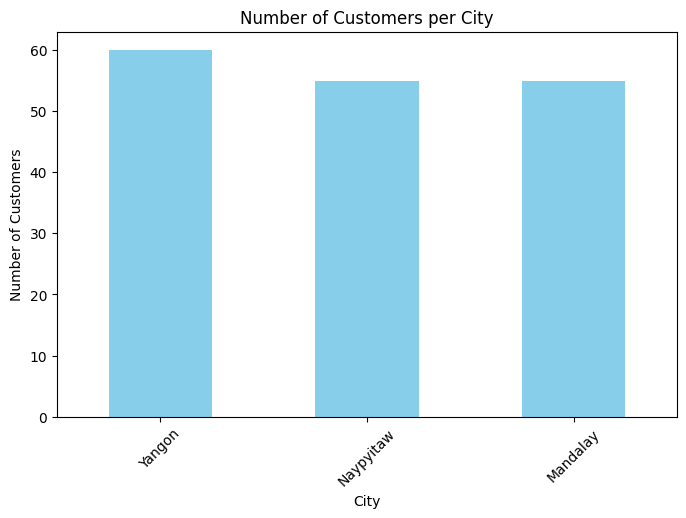

In [198]:
city_counts = elec_access['City'].value_counts()
plt.figure(figsize=(8, 5))
city_counts.plot(kind='bar', color='skyblue')
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per City")
plt.xticks(rotation=45)
plt.show()

compare average sale of total and electronic accessory

In [203]:
avg_total = fact_table_star['Total'].mean()
print(f"Average Total: {avg_total}")


avg_elec_access = elec_access['Total'].mean()
print(f"Average electronic accessory: {avg_elec_access}")



Average Total: 322.966749
Average electronic accessory: 319.6325382352942


checking frequency of each quantity ,each electronic product for each Invoice ID

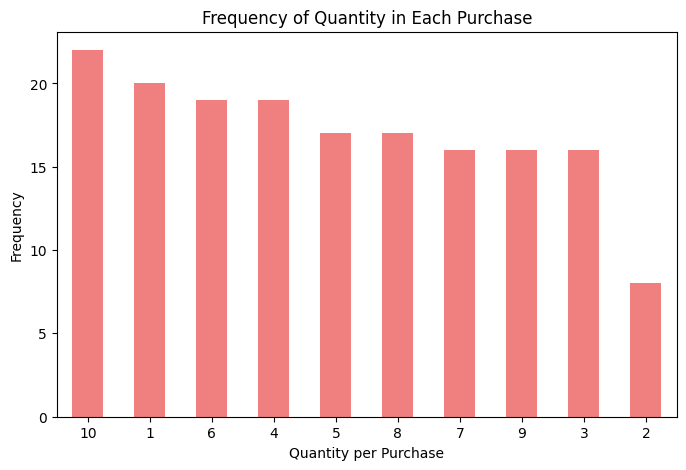

In [205]:
quantity_counts = elec_access['Quantity'].value_counts()
plt.figure(figsize=(8, 5))
quantity_counts.plot(kind='bar', color='lightcoral')
plt.xlabel("Quantity per Purchase")
plt.ylabel("Frequency")
plt.title("Frequency of Quantity in Each Purchase")
plt.xticks(rotation=0)
plt.show()

<Figure size 800x500 with 0 Axes>

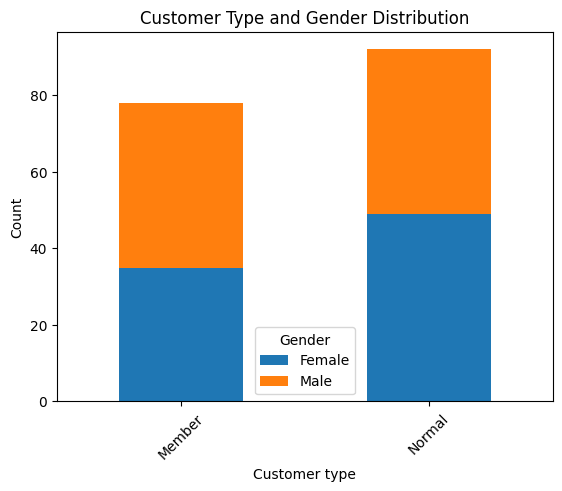

In [208]:
customer_type = elec_access.merge(customers_dim_star, on='customer_id', how='left')

# Plot number of each category in customer type and gender
plt.figure(figsize=(8, 5))
customer_type.groupby(['Customer type', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.ylabel("Count")
plt.title("Customer Type and Gender Distribution")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()



In general, what is clear is that non-members purchase more electronics. It seems that members know that the electronics in this store are not very good :) In addition, this store's electronics sales volume is lower than the average sales volume, so we can say that our guess may be correct.

### B

In [226]:
customer_type = fact_table_star.merge(customers_dim_star, on='customer_id', how='left')
customer_type

,Invoice ID,customer_id,product_id,branch_id,datetime_id,financial_id,payment_id,Quantity,cogs,Rating,Product line,Unit price,Tax 5%,Total,gross margin percentage,gross income,Branch,City,Customer type,Gender
0,750-67-8428,0,0,0,0,0,0,7,522.83,9.1,Health and beauty,74.69,26.1415,548.9715,4.761905,26.1415,A,Yangon,Member,Female
1,226-31-3081,1,1,1,1,1,1,5,76.40,9.6,Electronic accessories,15.28,3.8200,80.2200,4.761905,3.8200,C,Naypyitaw,Normal,Female
2,631-41-3108,2,2,0,2,2,2,7,324.31,7.4,Home and lifestyle,46.33,16.2155,340.5255,4.761905,16.2155,A,Yangon,Normal,Male
3,123-19-1176,3,3,0,3,3,0,8,465.76,8.4,Health and beauty,58.22,23.2880,489.0480,4.761905,23.2880,A,Yangon,Member,Male
4,373-73-7910,2,4,0,4,4,0,7,604.17,5.3,Sports and travel,86.31,30.2085,634.3785,4.761905,30.2085,A,Yangon,Normal,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,988,1,989,985,0,1,40.35,6.2,Health and beauty,40.35,2.0175,42.3675,4.761905,2.0175,C,Naypyitaw,Normal,Male
996,303-96-2227,1,989,2,990,986,0,10,973.80,4.4,Home and lifestyle,97.38,48.6900,1022.4900,4.761905,48.6900,B,Mandalay,Normal,Female
997,727-02-1313,3,990,0,991,987,1,1,31.84,7.7,Food and beverages,31.84,1.5920,33.4320,4.761905,1.5920,A,Yangon,Member,Male
998,347-56-2442,2,991,0,992,988,1,1,65.82,4.1,Home and lifestyle,65.82,3.2910,69.1110,4.761905,3.2910,A,Yangon,Normal,Male


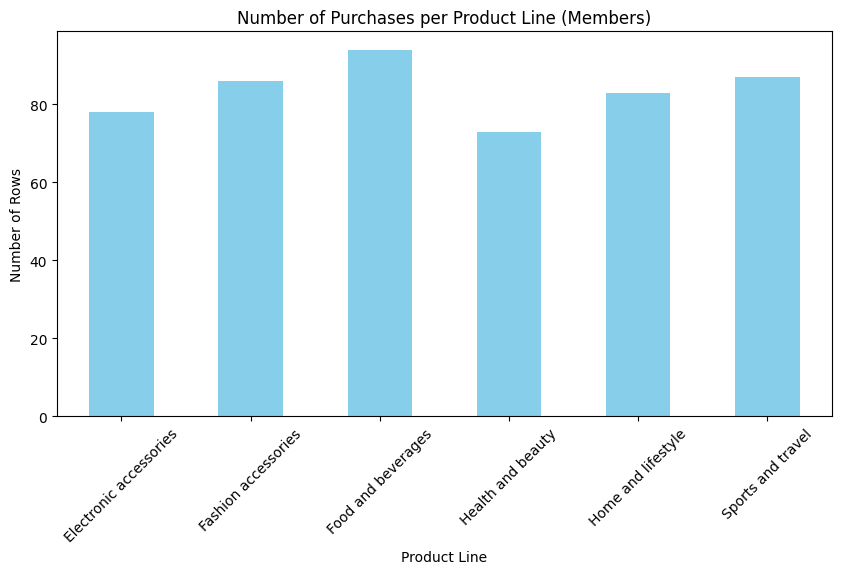

Product line
Electronic accessories    78
Fashion accessories       86
Food and beverages        94
Health and beauty         73
Home and lifestyle        83
Sports and travel         87
dtype: int64

In [234]:
import matplotlib.pyplot as plt

mem_prod_cnt = customer_type[customer_type["Customer type"]== "Member"].groupby("Product line").size()

plt.figure(figsize=(10, 5))
mem_prod_cnt.plot(kind='bar', color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Number of Rows')
plt.title('Number of Purchases per Product Line (Members)')
plt.xticks(rotation=45)
plt.show()
mem_prod_cnt


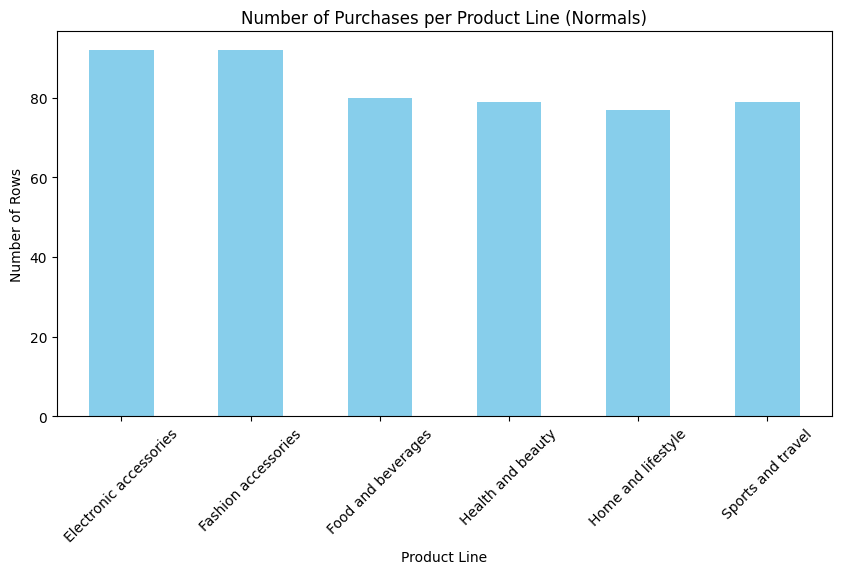

Product line
Electronic accessories    92
Fashion accessories       92
Food and beverages        80
Health and beauty         79
Home and lifestyle        77
Sports and travel         79
dtype: int64

In [233]:
import matplotlib.pyplot as plt


nrm_prod_cnt = customer_type[customer_type["Customer type"] == "Normal"].groupby("Product line").size()

# رسم نمودار
plt.figure(figsize=(10, 5))
nrm_prod_cnt.plot(kind='bar', color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Number of Rows')
plt.title('Number of Purchases per Product Line (Normals)')
plt.xticks(rotation=45)
plt.show()

nrm_prod_cnt


Checking the purchase amount

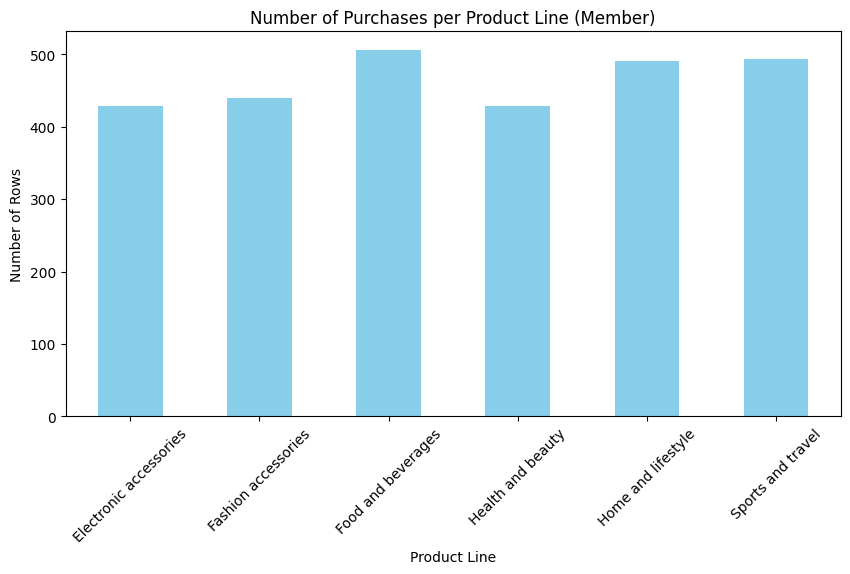

Product line
Electronic accessories    429
Fashion accessories       439
Food and beverages        506
Health and beauty         428
Home and lifestyle        490
Sports and travel         493
Name: Quantity, dtype: int64

In [245]:
import matplotlib.pyplot as plt


mem_prod_cnt = customer_type[customer_type["Customer type"] == "Member"].groupby("Product line")['Quantity'].sum()

# رسم نمودار
plt.figure(figsize=(10, 5))
mem_prod_cnt.plot(kind='bar', color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Number of Rows')
plt.title('Number of Purchases per Product Line (Member)')
plt.xticks(rotation=45)
plt.show()

mem_prod_cnt

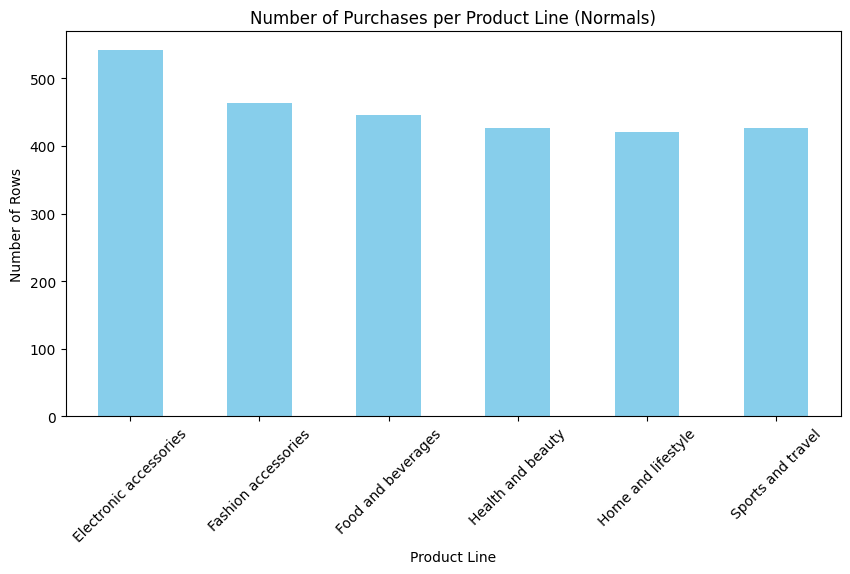

Product line
Electronic accessories    542
Fashion accessories       463
Food and beverages        446
Health and beauty         426
Home and lifestyle        421
Sports and travel         427
Name: Quantity, dtype: int64

In [246]:
import matplotlib.pyplot as plt


nrm_prod_cnt = customer_type[customer_type["Customer type"] == "Normal"].groupby("Product line")['Quantity'].sum()

# رسم نمودار
plt.figure(figsize=(10, 5))
nrm_prod_cnt.plot(kind='bar', color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Number of Rows')
plt.title('Number of Purchases per Product Line (Normals)')
plt.xticks(rotation=45)
plt.show()

nrm_prod_cnt

In [251]:
mem_prod_cnt = customer_type[customer_type["Customer type"] == "Member"].groupby("Product line")['Total'].sum()
mem_prod_cnt

Product line
Electronic accessories    24498.4950
Fashion accessories       26323.9620
Food and beverages        31357.6200
Health and beauty         25831.0395
Home and lifestyle        27978.0270
Sports and travel         28234.3005
Name: Total, dtype: float64

In [249]:
nrm_prod_cnt = customer_type[customer_type["Customer type"] == "Normal"].groupby("Product line")['Total'].sum()
nrm_prod_cnt

Product line
Electronic accessories    29839.0365
Fashion accessories       27981.9330
Food and beverages        24787.2240
Health and beauty         23362.6995
Home and lifestyle        25883.8860
Sports and travel         26888.5260
Name: Total, dtype: float64

#### Product Preferences and Purchase Volume Analysis

##### Most Favorite Product Lines  

| Customer Type | 1st Favorite Product Line | Count | 2nd Favorite Product Line | Count |
|--------------|---------------------------|-------|---------------------------|-------|
| Normal       | Electronic accessories     | 92    | Fashion accessories       | 92    |
| Member       | Food and beverages         | 94    | Fashion accessories       | 86    |

---

##### Most Sold Products (Based on Quantity)  

| Customer Type | 1st Most Sold Product | Quantity | 2nd Most Sold Product | Quantity | 3rd Most Sold Product | Quantity |
|--------------|-----------------------|----------|-----------------------|----------|-----------------------|----------|
| Normal       | Electronic accessories | 542      | Fashion accessories   | 463      | -                     | -        |
| Member       | Food and beverages     | 506      | Sports and travel     | 493      | Home and lifestyle    | 490      |

*(Other categories are significantly behind these three in terms of sales for members.)*

---

##### Income per Product Line  

| Customer Type | 1st Highest Revenue Product Line | Revenue  | 2nd Highest Revenue Product Line | Revenue  | 3rd Highest Revenue Product Line | Revenue  |
|--------------|----------------------------------|----------|----------------------------------|----------|----------------------------------|----------|
| Normal       | Electronic accessories          | 29,839.04 | Fashion accessories            | 27,981.93 | -                                | -        |
| Member       | Food and beverages              | 31,357.62 | Sports and travel              | 28,234.30 | Home and lifestyle              | 27,978.03 |



#### How can the store use this analysis to improve its marketing and sales strategy?
Well, I think that there is always fashion accessories on the market and we should always keep an eye on it because all the regular customers

But regarding normal, it seems that these people are more business-minded and are more looking for electronic devices. This amount is also significantly different from the second case, which is fashion accessoy, meaning that people who need electronic devices will need a greater number of the desired device in equal numbers (versus the fashion accessory).


Regarding regular customers, we should mention that in addition to their good lifestyle, these people seem to be significantly connected to different parts of their lives with this store, and the members of this store are very likely to be healthy and athletic people, so it is better to keep this in mind when purchasing your goods.

I can also point out that food and beverages contribute a lot to the supermarket's revenue, so we should consider it a positive point. Of course, we should be aware that these items have expiration dates, so we should act wisely.